# **Amazon Product Rating Prediction**

##### Created by Farhan Wily

#### **Description**
In this project, I am working on data analysis and building predictive models for product rating (Good or Bad) using classification methods. I am applying the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** framework to ensure the project is carried out in a well-structured and systematic manner.

source: https://www.datascience-pm.com/crisp-dm-2/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(np.float64(-0.5), np.float64(521.5), np.float64(520.5), np.float64(-0.5))

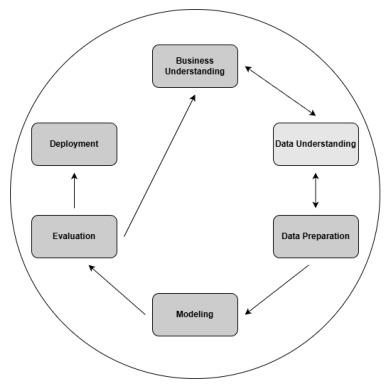

In [277]:
# @title
from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Project/Amazon Sales Prediction/CRISP-DM.png"
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')

### **1. Business Understanding**

The Business Understanding phase focuses on understanding the objectives and requirements of the project

#### **1.1 Business Objectives**

**The primary objective** of this project is to address a business challenge related to Amazon’s raw dataset, which contains customer product ratings. The available data requires thorough analysis and feature processing to better understand current business performance and to develop strategic insights that can drive future growth in sales and profitability.

**Key stakeholders** include the Board of Directors and managerial teams, who rely on accurate information to identify products with strong sales and profit potential based on customer evaluations. In addition, customers benefit from reliable recommendations that help them make informed purchasing decisions.

The project will be considered successful if the following conditions are met:

1.   Delivery of clear data analysis and visualizations that classify products into Good or Bad categories.
2.   The machine learning classification models achieve an accuracy of above 80%.


#### **1.2 Data Mining Objective**

**This project focuses on a binary classification** task, where the goal is to categorize products into either “Good” or “Bad” based on the rating_class variable. The rating_class serves as the target label that the classification models aim to predict.

**To evaluate the model’s performance**, several assessment metrics will be applied, including **accuracy**, **precision**, **recall**, **F1-score**, and the **AUC-ROC score**. The project will be deemed successful if the model achieves a minimum of 80% accuracy and precision, ensuring reliable and actionable prediction results.


#### **1.3 Project Plan**

1.   **Programming Language** : Python
2.   **Model** : XGBoost Classifier and Random Forest Classifier
3.   **Dashboard** : Interactive Dashboard using **Looker Studio**
4.   **Framework** : CRISP-DM (Cross-Industry Standard Process for Data Mining)
     - Business Understanding
     - Data Understanding
     - Data Preparation
     - Modeling
     - Evaluation
     - Deployment
4.   **Timeline** : 2 Month




### **2. Data Understanding**

Data understanding drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals

#### **2.1 Collect Initial Data**

The dataset used in this project was obtained from Kaggle and published by the contributor KARKAVELRAJA J.
source: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset

This dataset consists of 1K+ Amazon Product Ratings and Reviews data as per the details listed on the official Amazon website. This dataset consists several featuresas follows:

**Features**
- product_id : Product ID
- product_name : Name of the Product
- category : Category of the Product
- discounted_price : Discounted Price of the Product
- actual_price : Actual Price of the Product
- discount_percentage : Percentage of Discount for the Product
- rating : Rating of the Product
- rating_count : Number of people who voted for the Amazon rating
- about_product : Description about the Product
- user_id : ID of the user who wrote review for the Product
- user_name : Name of the user who wrote review for the Product
- review_id : ID of the user review
- review_title : Short review
- review_content : Long review
- img_link : Image Link of the Product
- product_link : Official Website Link of the Product


#### **2.2 Describe Data**

In this step we used to involves examining the dataset’s dimensions to understand the number of rows and columns available for analysis. Each feature is then reviewed to identify its corresponding data type, ensuring proper handling in subsequent preprocessing stages. Descriptive statistics such as **mean**, **median**, and **standard deviation** are calculated to gain an overview of the numerical variables. Additionally, the distribution of the target class is evaluated to determine whether the dataset is balanced or imbalanced, as this can significantly influence the performance of the classification models.

In [278]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [279]:
# @title
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv("/content/drive/My Drive/Project/Amazon Sales Prediction/dataset/amazon.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [280]:
# Show Dataframe
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [281]:
# Checking the data dimension
df.shape

(1465, 16)

In [282]:
# Checking the data types of each feature.
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [283]:
# Checking the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Based on the displayed information, it can be seen that the data is stored in an **object type** format and consists of **1,465 entries** within its index range.

In [284]:
# Convert data to numeric
df['discounted_price'] = (
    df['discounted_price']
      .str.replace(r'[^0-9.]', '', regex=True)
      .astype(float)
)

df['actual_price'] = (
    df['actual_price']
      .str.replace(r'[^0-9.]', '', regex=True)
      .astype(float)
)

df['discount_percentage'] = (
    df['discount_percentage']
      .str.replace(r'[^0-9.]', '', regex=True)
      .astype(float)
)

In [285]:
# Convert data to numeric
num_cols = ['rating']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [286]:
# Convert data to numeric
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

In [287]:
# Checking statistic descriptive data
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [288]:
df.describe(include='object').T

,count,unique,top,freq
product_id,1465,1351,B083342NKJ,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10
user_name,1465,1194,"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...",10
review_id,1465,1194,"R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...",10
review_title,1465,1194,"Worked on iPhone 7 and didn’t work on XR,Good ...",10
review_content,1465,1212,"I am not big on camera usage, personally. I wa...",8
img_link,1465,1412,https://m.media-amazon.com/images/I/413sCRKobN...,3


In [289]:
# Create rating class
df['rating_class'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
df['rating_class_str'] = df['rating_class'].apply(lambda x: "Good" if x >= 1 else 'Bad')

In [290]:
# Checking target distribution
df['rating_class'].value_counts(normalize=True) * 100

,proportion
rating_class,
1,75.767918
0,24.232082


**Description**:
*   Good : 1
*   Bad : 0

In [291]:
# Checking target distribution using object type
df['rating_class_str'].value_counts(normalize=True) * 100

,proportion
rating_class_str,
Good,75.767918
Bad,24.232082


Text(0.5, 1.0, 'Rating Class Distribution')

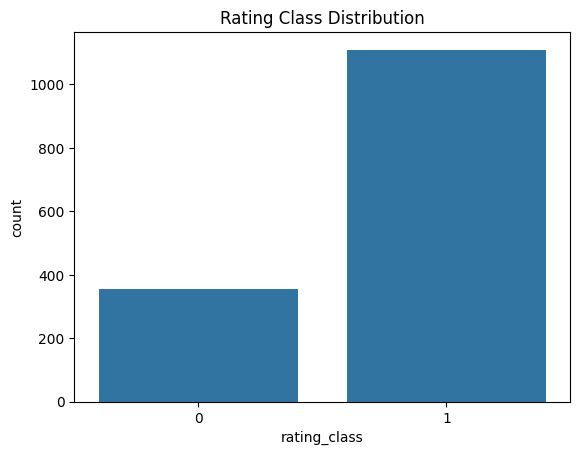

In [292]:
# rating_class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['rating_class'])
plt.title('Rating Class Distribution')

From the chart, it can be observed that products classified as “Good” are more dominant in number compared to those classified as “Bad.”

#### **2.3 Exploratory Data Analysis (EDA)**

In this section we want to dig deeper into the data. Query it, visualize it, and identify relationships among the data.

##### **2.3.1 Numerical Data Analysis**

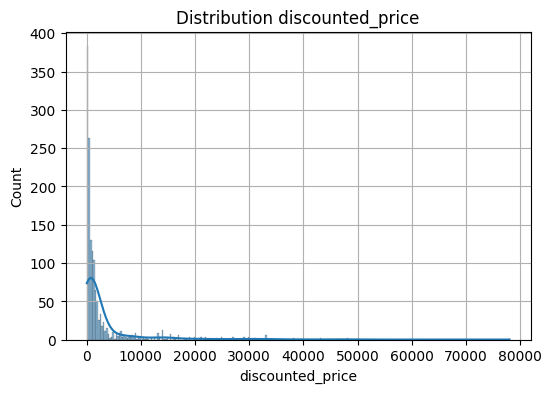

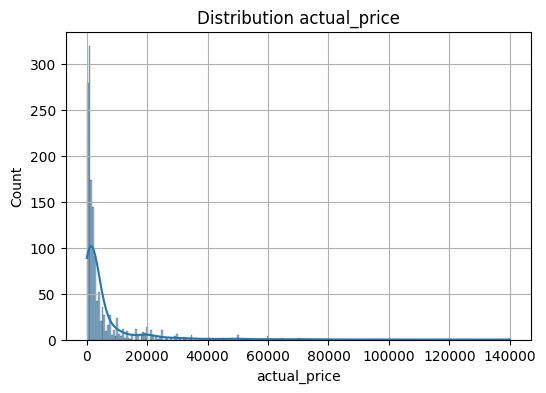

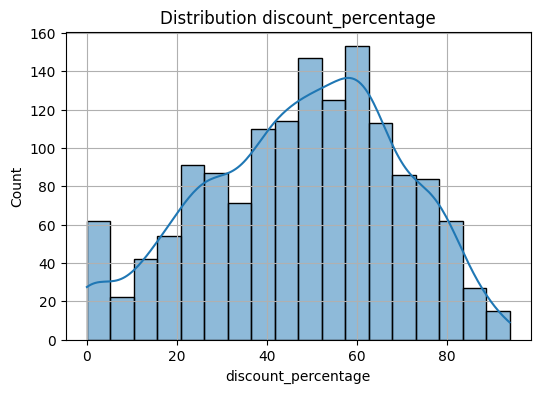

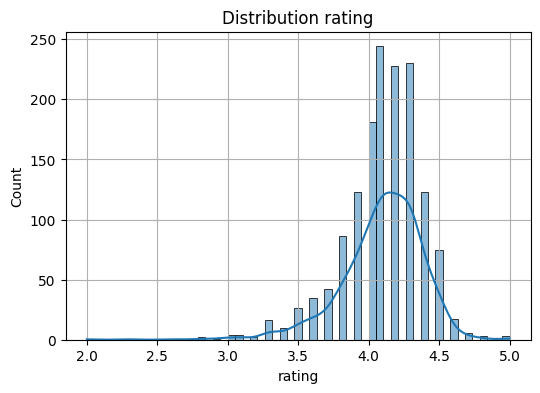

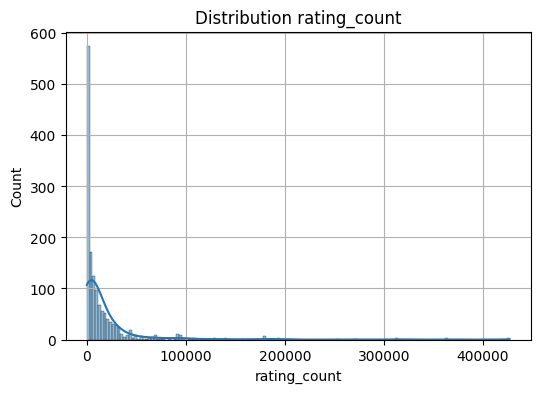

In [293]:
# Checking distribution each numeric features
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['discounted_price', 'actual_price', 'discount_percentage','rating', 'rating_count']

for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution {col}')
  plt.grid()
  plt.show()

In [294]:
# Checking skew
discounted_price_skew = df['discounted_price'].skew()
actual_price_skew = df['actual_price'].skew()
discount_percentage_skew = df['discount_percentage'].skew()
rating_skew = df['discount_percentage'].skew()
rating_count_skew = df['rating_count'].skew()

print("Discounted price skew value: ", discounted_price_skew)
print("Actual price skew value: ", actual_price_skew)
print("Discount percentage skew value: ", discount_percentage_skew)
print("Rating skew value: ", rating_skew)
print("Rating count skew value: ", rating_count_skew)

Discounted price skew value:  4.4523946100104945
Actual price skew value:  4.55987894318684
Discount percentage skew value:  -0.2905318638244812
Rating skew value:  -0.2905318638244812
Rating count skew value:  5.673784182331723


Based on the visualization results and the calculated skewness values, it is evident that several variables exhibit tendencies of both right-skewed and left-skewed distributions, as illustrated below:


*   **Right-skewed** : discounted_price, actual_price, rating_count
*   **Left-skewd** : discount_percentage, rating



In [295]:
# Calculate the length of the text
df['review_len'] = df['review_content'].astype(str).apply(len)

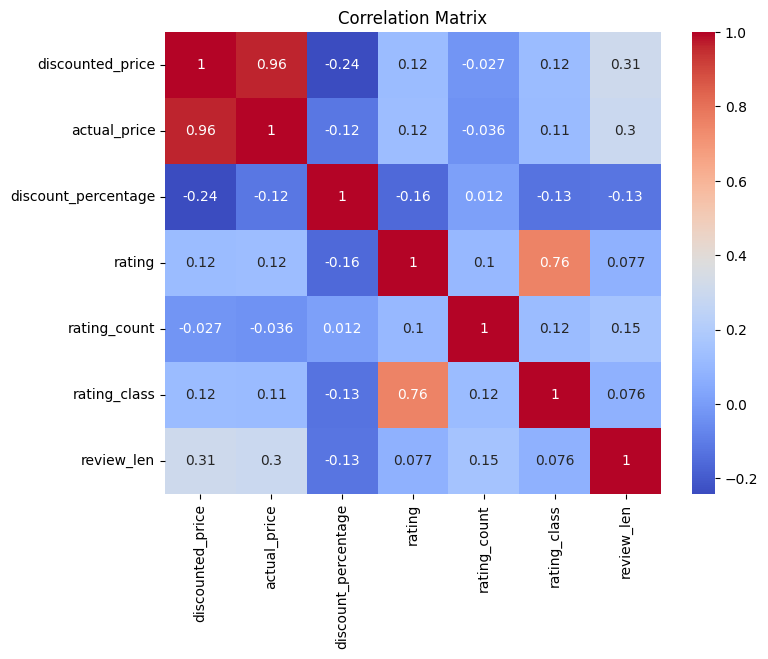

In [296]:
# Correlation Matrix
num_cols = ['discounted_price', 'actual_price', 'discount_percentage','rating', 'rating_count', 'rating_class', 'review_len']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Through the heatmap, we can observe the correlations among the numerical variables to understand the strength of their relationships. For example, there is a strong correlation between **actual_price** and **discounted_price**, as well as between **rating** and **rating_class**. These correlations indicate how closely these variables are associated with each other.

##### **2.3.2 Non-Numerical Data Analysis**

In [297]:
# Calculated amount of unique value in object type variable
print("Non-Numerical Features", "\n")
for col in df.select_dtypes(include=['object']).columns:
    print(col, ": ", df[col].nunique())

Non-Numerical Features 

product_id :  1351
product_name :  1337
category :  211
about_product :  1293
user_id :  1194
user_name :  1194
review_id :  1194
review_title :  1194
review_content :  1212
img_link :  1412
product_link :  1465
rating_class_str :  2


In [298]:
pd.crosstab(df['category'], df['rating_class'], normalize='index')

rating_class,0,1
category,,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1.0,0.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,0.0,1.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,1.0,0.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,1.0,0.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,0.0,1.0
...,...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0,1.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",0.0,1.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",0.0,1.0


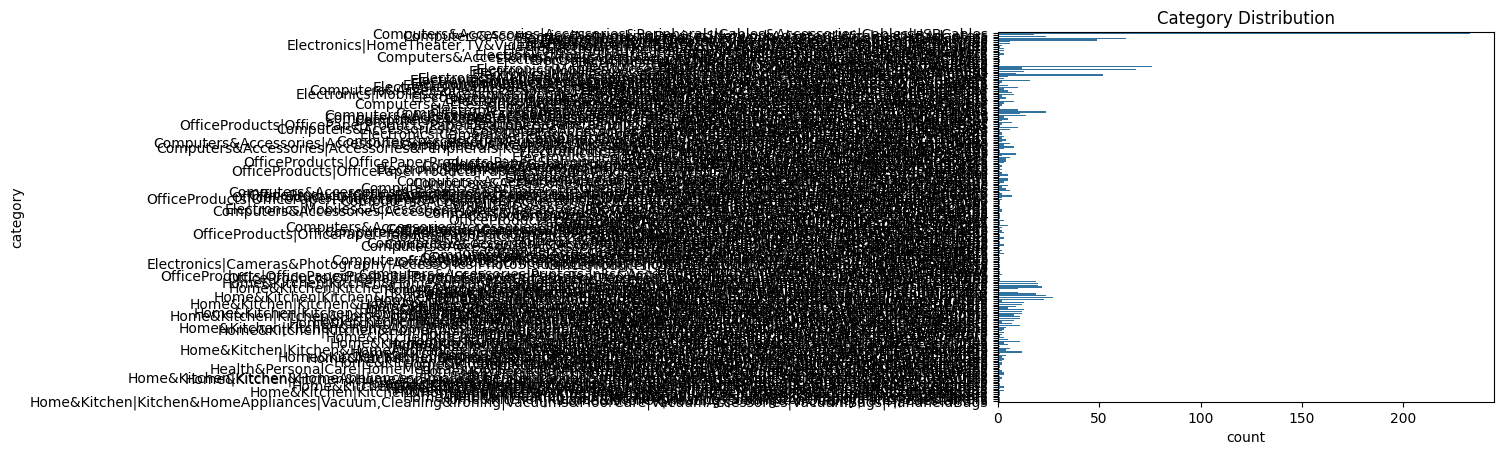

In [299]:
# Distribution of category
sns.countplot(y=df['category'])
plt.title("Category Distribution")
plt.show()

The category feature contains too many unique values, making it difficult to clearly observe and interpret its distribution.

In [300]:
# Calculate the length of the text
df['review_len'] = df['review_content'].astype(str).apply(len)

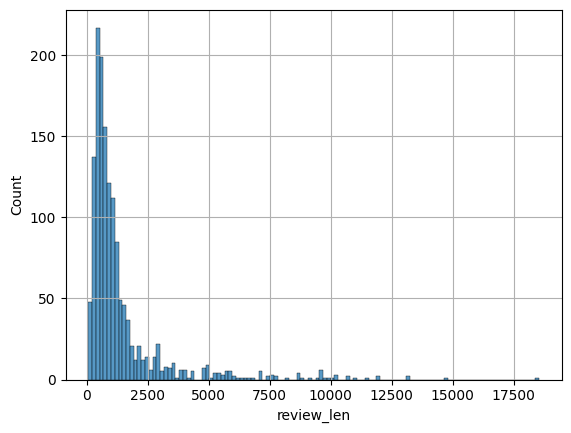

In [301]:
# Visualization of text length distribution
sns.histplot(df['review_len'])
plt.grid()

In [302]:
# Statistic descriptive of the length of the text
df['review_len'].describe()

,review_len
count,1465.000000
mean,1394.137884
std,1823.491796
min,67.000000
25%,505.000000
50%,823.000000
75%,1388.000000
max,18547.000000


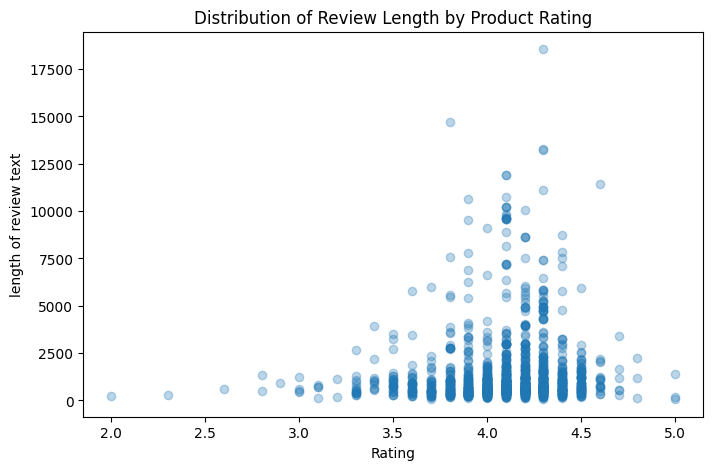

In [303]:
# Visualization review_len vs rating
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.scatter(df['rating'], df['review_len'], alpha=0.3)
plt.title('Distribution of Review Length by Product Rating')
plt.xlabel('Rating')
plt.ylabel('length of review text')
plt.show()

It can be observed that the distribution of review text length relative to product ratings is left-skewed, indicating that longer written reviews are more commonly associated with products classified as “Good.”

#### **2.4 Verify Data Equality**

In this section we want to know how accurate and reliable is the dataset? Record any issues related to data quality.

In [304]:
# Checking missing values
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,1
rating_count,2
about_product,0
user_id,0


There are still missing values present in several variables/features, such as rating and rating_count.

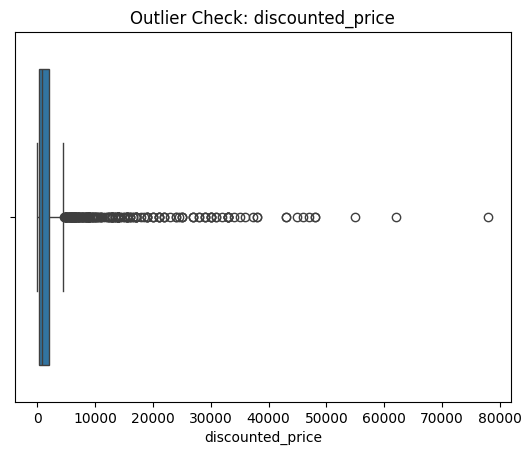

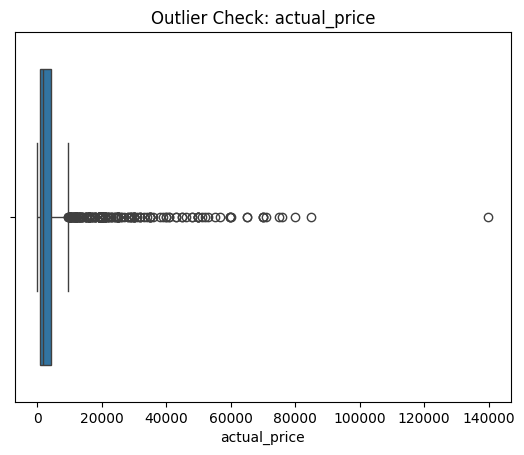

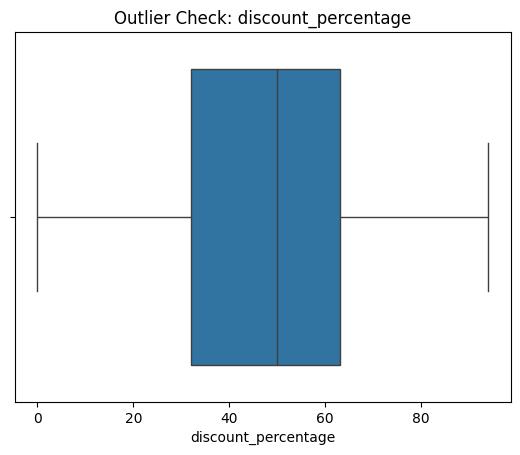

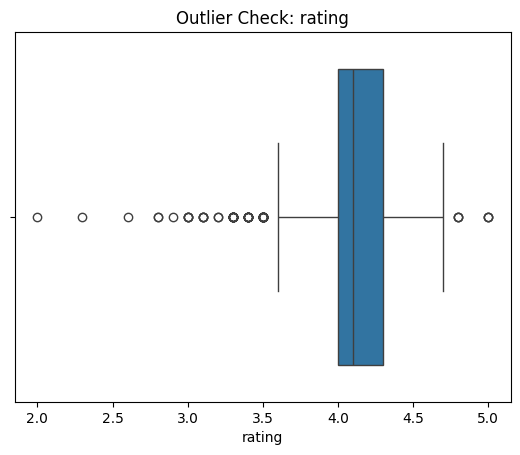

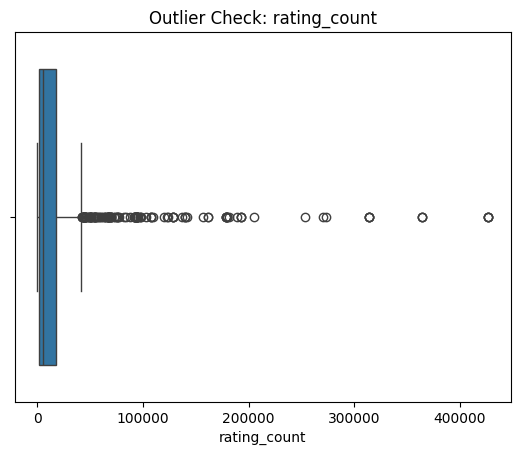

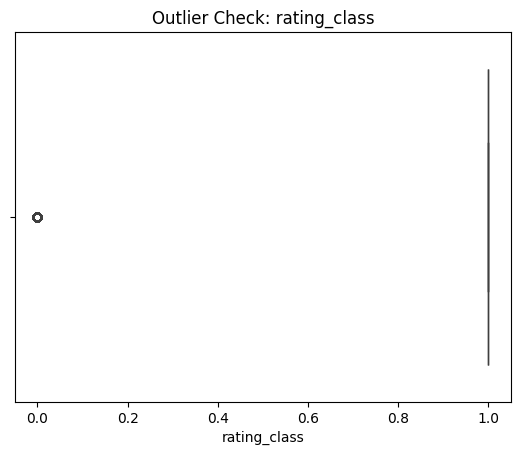

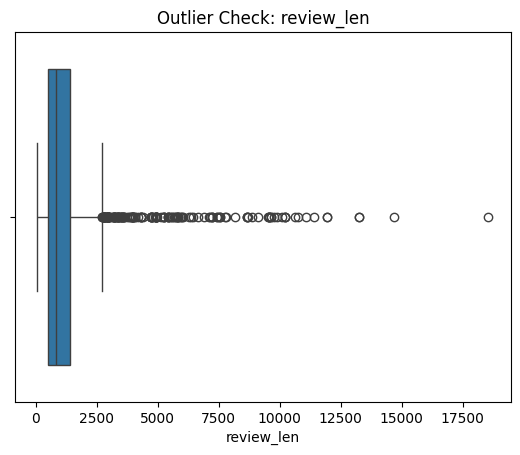

In [305]:
# Checking outliers
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()

Outlier detection can initially be performed using a boxplot. Based on the visualization, several variables appear to contain a significant number of outliers according to this method. However, these potential outliers may not necessarily be problematic in terms of their business meaning. Therefore, it is important to validate the findings by applying a more statistical approach such as the Interquartile Range (IQR) method.

In [306]:
# IQR check
import pandas as pd

num_cols = ['discounted_price', 'actual_price', 'discount_percentage',
            'rating', 'rating_count', 'rating_class', 'review_len']

iqr_results = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)

    iqr_results[col] = {
        'Q1': Q1,
        'Median (Q2)': Q2,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# Print hasilnya
for col, result in iqr_results.items():
    print(f"\n=== {col} ===")
    for key, value in result.items():
        print(f"{key}: {value}")


=== discounted_price ===
Q1: 325.0
Median (Q2): 799.0
Q3: 1999.0
IQR: 1674.0
Lower Bound: -2186.0
Upper Bound: 4510.0
Outlier Count: 217

=== actual_price ===
Q1: 800.0
Median (Q2): 1650.0
Q3: 4295.0
IQR: 3495.0
Lower Bound: -4442.5
Upper Bound: 9537.5
Outlier Count: 213

=== discount_percentage ===
Q1: 32.0
Median (Q2): 50.0
Q3: 63.0
IQR: 31.0
Lower Bound: -14.5
Upper Bound: 109.5
Outlier Count: 0

=== rating ===
Q1: 4.0
Median (Q2): 4.1
Q3: 4.3
IQR: 0.2999999999999998
Lower Bound: 3.5500000000000003
Upper Bound: 4.75
Outlier Count: 74

=== rating_count ===
Q1: 1186.0
Median (Q2): 5179.0
Q3: 17336.5
IQR: 16150.5
Lower Bound: -23039.75
Upper Bound: 41562.25
Outlier Count: 141

=== rating_class ===
Q1: 1.0
Median (Q2): 1.0
Q3: 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier Count: 355

=== review_len ===
Q1: 505.0
Median (Q2): 823.0
Q3: 1388.0
IQR: 883.0
Lower Bound: -819.5
Upper Bound: 2712.5
Outlier Count: 171


Based on the IQR analysis, the observations for each feature are as follows:

- **discounted_price**: The discounted price range varies significantly, and many high-priced items are flagged as outliers by the IQR method. This condition is common in e-commerce datasets.

- **actual_price**: The original product prices span a wide spectrum, from low-cost to premium items. As a result, many high-value products are classified as outliers, which is expected.

- **discount_percentage**: The distribution of discount percentages appears clean, with no extreme values detected. This feature is well-structured for further analysis.

- **rating**: Some outliers are present due to products receiving very low or very high ratings. Such variations are normal in rating data.

- **rating_count**: Popular products with high rating counts are marked as outliers by IQR. However, from a business perspective, these represent valuable information about best-selling items.

- **rating_class**: Longer written reviews appear more frequently in the dataset, and although considered outliers statistically, this is typical for customer review data.

In [307]:
# Checking duplicate value
df.duplicated().sum()

np.int64(0)

no duplication value

In [308]:
# Validate data consistency
df[df['discounted_price'] > df['actual_price']]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_class,rating_class_str,review_len


In [309]:
# Validate data consistency
df[(df['rating'] < 1) | (df['rating'] > 5)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_class,rating_class_str,review_len


In [310]:
df['calc_discount'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
df[['discount_percentage', 'calc_discount']].head()

,discount_percentage,calc_discount
0,64.0,63.694268
1,43.0,42.979943
2,90.0,89.520800
3,53.0,52.932761
4,61.0,61.403509


the data is consistent

### **3. Data Preparation**

Data preparation typically represents the largest portion of work in a project, accounting for roughly 80% of the process.

#### 3.1 **Select Data**

Decide which datasets are appropriate for the analysis and clearly explain the rationale behind including or removing them.

Since the number of categories is too large, we will treat the existing categories as sub_category. Meanwhile, for the category feature, a new variable will be created by selecting the 20 most frequent categories, while the remaining categories will be grouped into a single label called “Other.”

In [311]:
df['sub_category'] = df['category']

In [312]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,rating_class,rating_class_str,review_len,calc_discount,sub_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,1,Good,483,63.694268,Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,1,Good,1186,42.979943,Computers&Accessories|Accessories&Peripherals|...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,0,Bad,271,89.520800,Computers&Accessories|Accessories&Peripherals|...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,1,Good,443,52.932761,Computers&Accessories|Accessories&Peripherals|...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,1,Good,2451,61.403509,Computers&Accessories|Accessories&Peripherals|...


In [313]:
# Take the 20 most frequently appearing categories, besides that → "Other"
top_categories = df['sub_category'].value_counts().nlargest(20).index
df["category"] = df["sub_category"].apply(
    lambda x: x if x in top_categories else "Other"
)

In [314]:
# number of unique values
df['category'].nunique()

21

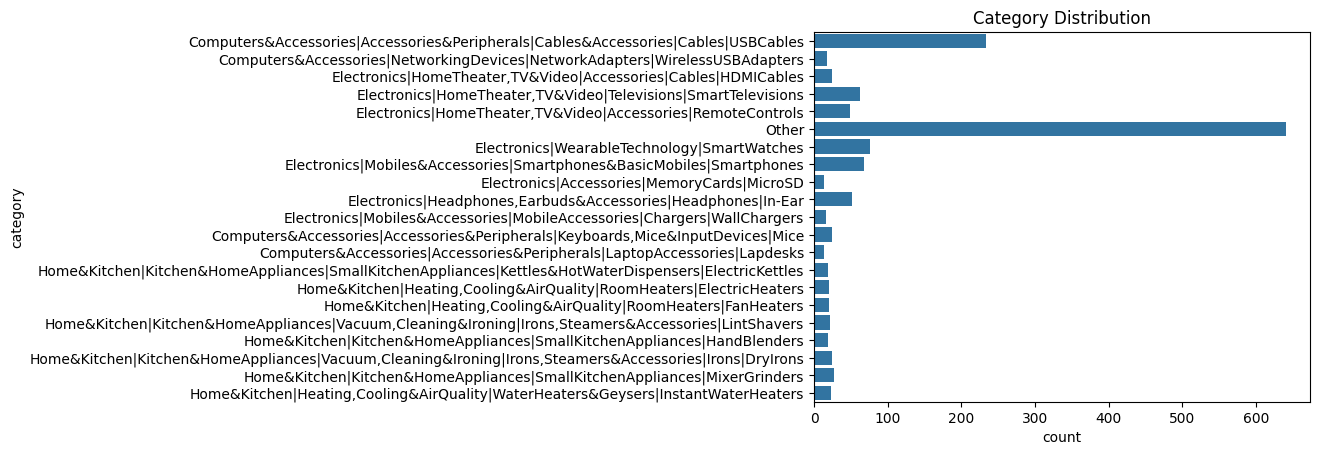

In [315]:
# Distribution of category
sns.countplot(y=df['category'])
plt.title("Category Distribution")
plt.show()

We have identified 21 categories derived from the 20 most frequently sold sub-categories, which will be carried forward into the next stage of data processing.

In [316]:
# Checking features
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_class',
       'rating_class_str', 'review_len', 'calc_discount', 'sub_category'],
      dtype='object')

We will only retain a selection of features that provide predictive value for the next stage of the project, as outlined below:

In [317]:
# Select data
df = df[['category','sub_category','discounted_price','actual_price','discount_percentage','rating','rating_count','about_product','review_title','review_content','review_len','rating_class','rating_class_str']]

In [318]:
df.head()

,category,sub_category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,review_len,rating_class,rating_class_str
0,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,483,1,Good
1,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,1186,1,Good
2,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",271,0,Bad
3,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",443,1,Good
4,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2451,1,Good


#### 3.2 **Clean Data**

It is common for this step to take the longest, and neglecting it may lead to poor quality outputs. At this point, data errors are usually handled by fixing, filling, or eliminating problematic entries.

In [319]:
# Checking missing values
df.isna().sum()

,0
category,0
sub_category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,1
rating_count,2
about_product,0
review_title,0
review_content,0


In [320]:
# Filling NaN values
df['rating'] = df['rating'].fillna(df['rating'].median())
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median())

In [321]:
# Remove duplicates
df = df.drop_duplicates()

#### 3.3 **Construct Data (Feature Engineering)**

Create additional features that can provide more useful insights. Since we have already created the **rating_class** target variable, along with **review_len** and **sub_category**, the next step is to generate a new feature called **sentiment**.

In [322]:
from textblob import TextBlob

df['full_review'] = df['review_title'].astype(str) + " " + df['review_content'].astype(str)
df['sentiment'] = df['full_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [323]:
df['sentiment'].head()

,sentiment
0,0.473958
1,0.294589
2,0.500000
3,0.331795
4,0.260013


In [324]:
df['sentiment'].describe()

,sentiment
count,1374.000000
mean,0.280881
std,0.132761
min,-0.600000
25%,0.192930
50%,0.271329
75%,0.359298
max,1.000000


If the sentiment score is **greater than 0**, the review is considered to have a **positive response**, while a score **below 0** indicates a **negative response**.

In [325]:
# Creating sentiment_label
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

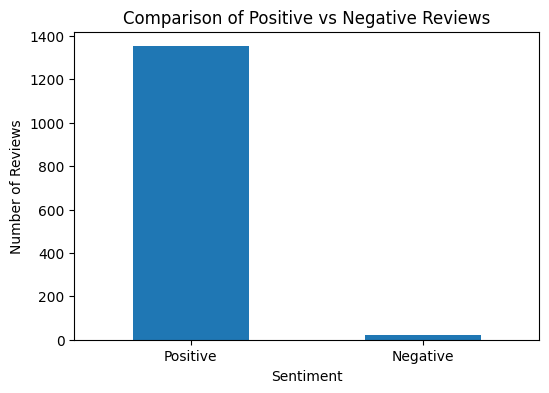

In [326]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_label'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title('Comparison of Positive vs Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

#### 3.4 **Format Data**

In this section, we adjust the data format when needed. For instance, convert numerical values stored as text into proper numeric types to enable mathematical processing.

In [327]:
df.columns

Index(['category', 'sub_category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'review_title', 'review_content', 'review_len', 'rating_class',
       'rating_class_str', 'full_review', 'sentiment', 'sentiment_label'],
      dtype='object')

##### 3.4.1 **Encoding for categorical**

In [328]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

cat_cols = ['category', 'sub_category', 'sentiment_label']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

##### 3.4.2 **TF-IDF for text columns**

In [329]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['full_review'])

In [330]:
X_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118224 stored elements and shape (1374, 5000)>

In [331]:
print(X_text)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118224 stored elements and shape (1374, 5000)>
  Coords	Values
  (0, 3849)	0.20502583268085584
  (0, 944)	0.3525713314798128
  (0, 3608)	0.1549732340095303
  (0, 1760)	0.16913597056771573
  (0, 4694)	0.12781198212086384
  (0, 2854)	0.1153106274509149
  (0, 3468)	0.21883777856848055
  (0, 3761)	0.09160458348756208
  (0, 2020)	0.2452948878829904
  (0, 3555)	0.1392976279358323
  (0, 2603)	0.08653336161056524
  (0, 1525)	0.11162020328889566
  (0, 1809)	0.07621184551389608
  (0, 4519)	0.2092803734093687
  (0, 1075)	0.1915484023815714
  (0, 4492)	0.22464297451554
  (0, 4157)	0.09912365309098108
  (0, 4072)	0.1738164313537741
  (0, 3117)	0.1109328070480779
  (0, 2356)	0.1370980171304747
  (0, 826)	0.16766549725555577
  (0, 3633)	0.09801149100294701
  (0, 2206)	0.0964820640788374
  (0, 2737)	0.09306497527614553
  (0, 420)	0.06826631446497085
  :	:
  (1373, 4642)	0.08731623239413266
  (1373, 4497)	0.07682395523243586
  (1373, 4986)	0

##### 3.4.3 **Combine**

In [332]:
# Combine
import scipy.sparse as sp

num_cols = [
    'discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'review_len', 'sentiment'
]

cat_cols = ['category', 'sub_category', 'sentiment_label']

X_num = df[num_cols].values
X_cat = df[cat_cols].values

# sparse + dense
X_final = sp.hstack([X_text, X_num, X_cat])
y = df['rating_class']


##### 3.4.4 **Data Splitiing**

In [333]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

### **4. Modeling**

This section is commonly viewed as the most engaging aspect of data science, yet it usually requires the least amount of time. Here, various predictive models are developed and assessed using multiple modeling approaches.

In this project, we compare the performance of three widely used classification models: **Random Forest**, **XGBoost**, and **LightGBM**.

In [334]:
# Import model
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### 4.1 **Random Forest Model**

In the Amazon Sales rating_class prediction project, Random Forest works by creating many decision trees using different samples of your data. Each tree learns patterns about what makes a product likely to receive rating_class = 0 or 1.
The final prediction is based on the majority vote from all trees.

Why it works for this project:
- It handles noisy features such as inconsistent review lengths.
- It is robust when the data has many outliers.
- It performs well even without heavy parameter tuning.

In [335]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=50,
    min_samples_split=5,
    min_samples_leaf=1,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.6s


building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    2.7s


building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500
building tree 206 of 500
building tree 207 of 500
building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    6.3s


building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500building tree 388 of 500

building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished


#### 4.2 **XGBoost**

In this project, XGBoost builds trees sequentially, where each new tree tries to fix the mistakes of the previous one.
XGBoost learns subtle patterns, such as how discount_percentage, sentiment score, or rating_count influence the rating_class.

Why it works for this project:
- Captures complex relationships between product features and user ratings.
- Performs very well with numerical features like prices and sentiment.
- Often gives higher accuracy on classification tasks like rating_class prediction.

In [336]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


#### 4.3 **LightGBM**

LightGBM is also a gradient boosting model, but optimized for speed and scalability. It grows trees leaf-wise, allowing it to capture deeper patterns in the Amazon product dataset.

Why it works for this project:
- Extremely fast training, even with many one-hot encoded category features.
- Handles large feature sets efficiently.
- Often achieves high accuracy with minimal tuning.

In [337]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 823, number of negative: 276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25002
[LightGBM] [Info] Number of data points in the train set: 1099, number of used features: 996
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748863 -> initscore=1.092555
[LightGBM] [Info] Start training from score 1.092555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### **5. Evaluation**

In this section we will evaluate the performance of each model using multiple evaluation metrics.

In [338]:
def evaluate_model(name, y_test, y_pred):
    print("=" * 60)
    print(f"MODEL: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [339]:
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("LightGBM", y_test, y_pred_lgb)

MODEL: Random Forest
Accuracy: 0.7890909090909091

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.17      0.29        69
           1       0.78      1.00      0.88       206

    accuracy                           0.79       275
   macro avg       0.85      0.58      0.58       275
weighted avg       0.82      0.79      0.73       275


Confusion Matrix:
[[ 12  57]
 [  1 205]]
MODEL: XGBoost
Accuracy: 0.8327272727272728

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59        69
           1       0.84      0.95      0.89       206

    accuracy                           0.83       275
   macro avg       0.81      0.71      0.74       275
weighted avg       0.83      0.83      0.82       275


Confusion Matrix:
[[ 33  36]
 [ 10 196]]
MODEL: LightGBM
Accuracy: 0.8254545454545454

Classification Report:
              precision    recall  f1-score   suppo

#### 5.1 **Model Comparison**

In [340]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

models = {
    "XGBoost": y_pred_xgb,
    "Random Forest": y_pred_rf,
    "LightGBM": y_pred_lgb
}

results = []

for name, pred in models.items():
    results.append([
        name,
        accuracy_score(y_test, pred),
        precision_score(y_test, pred),
        recall_score(y_test, pred),
        f1_score(y_test, pred)
    ])

df_results = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1 Score"
])

df_results

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.832727,0.844828,0.951456,0.894977
1,Random Forest,0.789091,0.782443,0.995146,0.876068
2,LightGBM,0.825455,0.834746,0.956311,0.891403


#### 5.2 **ROC Curve**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


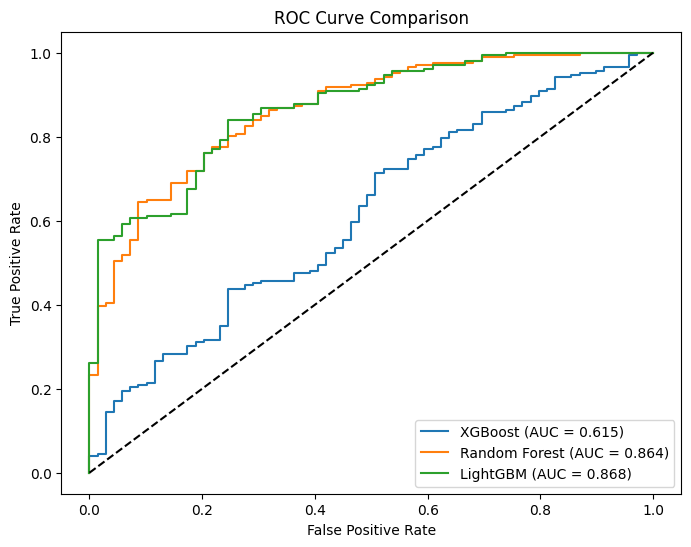

In [341]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

def plot_roc(model, name):
    y_prob = model.predict_proba(X_test_dense)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plot_roc(xgb_model, "XGBoost")
plot_roc(rf_model, "Random Forest")
plot_roc(lgb_model, "LightGBM")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

#### 5.3 **Final Dataset for Looker Studio**

In [342]:
# Using LightGBM
df['prediction'] = lgb_model.predict(X_final.toarray())
df['prediction_proba'] = lgb_model.predict_proba(X_final.toarray())[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [344]:
df['prediction_label'] = df['prediction'].map({1: "Good", 0: "Bad"})

In [345]:
df

,category,sub_category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,review_len,rating_class,rating_class_str,full_review,sentiment,sentiment_label,prediction,prediction_proba,prediction_label
0,0,10,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,483,1,Good,"Satisfied,Charging is really fast,Value for mo...",0.473958,1,1,0.999999,Good
1,0,10,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,1186,1,Good,"A Good Braided Cable for Your Type C Device,Go...",0.294589,1,1,0.999999,Good
2,0,10,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",271,0,Bad,"Good speed for earlier versions,Good Product,W...",0.500000,1,0,0.000015,Bad
3,0,10,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",443,1,Good,"Good product,Good one,Nice,Really nice product...",0.331795,1,1,0.999998,Good
4,0,10,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2451,1,Good,"As good as original,Decent,Good one for second...",0.260013,1,1,0.999998,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,20,192,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",479,1,Good,"Received the product without spanner,Excellent...",0.323810,1,1,0.999996,Good
1461,20,172,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",1036,1,Good,"ok,everything was good couldn't return bcoz I ...",0.195486,1,1,0.999983,Good
1462,20,138,2219.0,3080.0,28.0,3.6,468.0,International design and styling|Two heat sett...,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",880,0,Bad,"very good,Work but front melt after 2 month,Go...",0.212000,1,1,0.999638,Good
1463,20,129,1399.0,1890.0,26.0,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,388,1,Good,"Fan Speed is slow,Good quality,Good product,go...",-0.170167,0,1,0.999977,Good


In [347]:
# Save the data
df.to_csv('/content/drive/My Drive/Project/Amazon Sales Prediction/dataset/amazon_final.csv', index=False)